Distance from center of Pluto Rcm = 2191.781 km
Radius of Pluto Rp = 1200.000 km
Period T = 6.591 days
Tcow = 9.212 days, vcow = 197.365 m/s


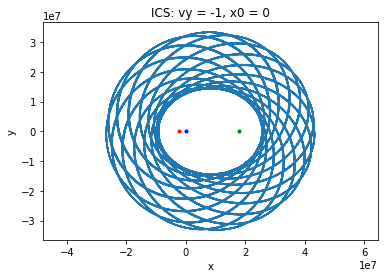

In [7]:
# numerical integration of Pluto Charon orbits

from pylab import *

#defining constants

Rp = 1200 * 1000.0   # m  Pluto radius in meters
Rc = 600  * 1000.0   # m

Dpc = 20000 * 1000.0   # m  distance between the two centres

Mp =  1.3e22 # mass in kg
Mc =  1.6e21 

# center of mass calculation

Rcm = ((Mp*0)+(Mc*Dpc))/(Mp+Mc)

print('Distance from center of Pluto Rcm = %.3f km' % (Rcm/1000.0))
print('Radius of Pluto Rp = %.3f km' % (Rp/1000.0))

# Period calculation

G = 6.67e-11  # Big G gravitational constant

T = sqrt(((4*pi**2)*(Dpc**3))/(G*(Mc+Mp)))
 
print('Period T = %.3f days' % (T/(24*60*60)))

# orbital calculations

GMp = G*Mp  # convenient constants
GMc = G*Mc

# spherical cow estimate

GM = GMp+GMc
R = 25000 *1000.  # 25 000 km

vcow = sqrt(GM/R)
Tcow = sqrt(((4*pi**2)*(R**3))/(GM))

print('Tcow = %.3f days, vcow = %.3f m/s' % (Tcow/(24*60*60), vcow))

dt = Tcow/100         # time step in seconds: make this at least Tcow/100
end_time = 100* Tcow  # end time in seconds: make this 10 to 100 Tcow

time_array=arange(0,end_time, dt)
nt=len(time_array)                  #number of time steps

#initialize position and velocity arrays with zeros
x=zeros(nt)
y=zeros(nt)
vx=zeros(nt)
vy=zeros(nt)

#initial values
x[0] = 0
y[0] = R      #  25000 km  
vx[0]= vcow  # m/s   
vy[0] = 0

i=0 #initialize loop

xp = -Rcm			# locations of Pluto and Charon on the x axis, realtive to centre of mass
xc = Dpc - Rcm

while i<nt-1: #loop to numerically integrate system
	rp =  sqrt((x[i]-xp)**2 + y[i]**2) #distance from spacecraft to Pluto
	rc =  sqrt((x[i]-xc)**2 + y[i]**2)  #distance from spacecraft to Charon

	vx[i+1] = vx[i]-GMp*(x[i]-xp)*dt/rp**3-GMc*(x[i]-xc)*dt/rc**3
	vy[i+1] = vy[i]-GMc*y[i]*dt/rc**3-GMp*y[i]*dt/rp**3

	x[i+1] = x[i]+vx[i+1]*dt
	y[i+1] = y[i]+vy[i+1]*dt

	i=i+1

# plot the orbit, using a blue dot for the origin, a red dot for Pluto and a green dot for Charon

figure()
plot([0],[0],'b.', [xp],[0],'r.', [xc],[0],'g.', x,y)  
axis('equal')  # a trick to make the axes equal so circles are not distorted
title("ICS: vy = -1, x0 = 0")
ylabel('y')
xlabel('x')

savefig('pluto_charon_sat_orbit5.pdf')
show()
